#### import library

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms


#### hyper-parameter

In [5]:
EPOCHS = 10
ACC_FREQUENCE = 300
batch_size = 64
learning_rate = 0.01
momentum = 0.5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#### prepare dataset

In [6]:
data_hub = '../data_hub'
transform = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Normalize((0.1307,), (0.3081,))
])


train_dataset = datasets.MNIST(root=data_hub, train=True, download=True, transform=transform)  
test_dataset = datasets.MNIST(root=data_hub, train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)



#### build net work

In [7]:
from utils.TEST import NET
model = NET().to(device)

#### define loss && optimizer

In [8]:
criterion = torch.nn.CrossEntropyLoss()  # 交叉熵损失
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)  # lr学习率，momentum冲量

#### train fn

In [9]:
def train(epoch):
    running_loss = 0.0  # 这整个epoch的loss清零
    running_total = 0
    running_correct = 0
    for batch_idx, data in enumerate(train_loader, 0):
        inputs, target = data
        inputs, target = inputs.to(device), target.to(device)
        optimizer.zero_grad()

        # forward + backward + update
        outputs = model(inputs)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        # 把运行中的loss累加起来，为了下面300次一除
        running_loss += loss.item()
        # 把运行中的准确率acc算出来
        _, predicted = torch.max(outputs.data, dim=1)
        running_total += inputs.shape[0]
        running_correct += (predicted == target).sum().item()

        if batch_idx % ACC_FREQUENCE == (ACC_FREQUENCE-1):  # 没FRE_QUEncE次出一个平均损失,和准确率
            print('[%d, %5d]: loss: %.3f , acc: %.2f %%'
                  % (epoch + 1, batch_idx + 1, running_loss / ACC_FREQUENCE, 100 * running_correct / running_total))
            running_loss = 0.0  # 这小批的loss清零
            running_total = 0
            running_correct = 0  # 这小批的acc清零
train(1)

[2,   300]: loss: 0.805 , acc: 75.86 %
[2,   600]: loss: 0.231 , acc: 92.95 %
[2,   900]: loss: 0.159 , acc: 95.20 %


#### evaluation fn

In [10]:
def test(epoch):
    correct = 0
    total = 0
    with torch.no_grad():  # 测试集不用算梯度
        for data in test_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, dim=1)  # dim = 1 列是第0个维度，行是第1个维度，沿着行(第1个维度)去找1.最大值和2.最大值的下标
            total += labels.size(0)  # 张量之间的比较运算
            correct += (predicted == labels).sum().item()
    acc = correct / total
    print('[%d / %d]: Accuracy on test set: %.1f %% ' % (epoch+1, EPOCHS, 100 * acc))  # 求测试的准确率，正确数/总数
    return acc

#### save you net

#### main

[1,   300]: loss: 0.127 , acc: 96.12 %
[1,   600]: loss: 0.107 , acc: 96.68 %
[1,   900]: loss: 0.102 , acc: 96.84 %
[1 / 10]: Accuracy on test set: 97.6 % 
[2,   300]: loss: 0.089 , acc: 97.36 %
[2,   600]: loss: 0.079 , acc: 97.54 %
[2,   900]: loss: 0.077 , acc: 97.78 %
[2 / 10]: Accuracy on test set: 97.8 % 
[3,   300]: loss: 0.066 , acc: 97.95 %
[3,   600]: loss: 0.068 , acc: 97.83 %
[3,   900]: loss: 0.068 , acc: 97.93 %
[3 / 10]: Accuracy on test set: 98.2 % 
[4,   300]: loss: 0.057 , acc: 98.17 %
[4,   600]: loss: 0.057 , acc: 98.30 %
[4,   900]: loss: 0.061 , acc: 98.12 %
[4 / 10]: Accuracy on test set: 98.3 % 
[5,   300]: loss: 0.051 , acc: 98.34 %
[5,   600]: loss: 0.051 , acc: 98.41 %
[5,   900]: loss: 0.052 , acc: 98.43 %
[5 / 10]: Accuracy on test set: 98.5 % 
[6,   300]: loss: 0.046 , acc: 98.60 %
[6,   600]: loss: 0.052 , acc: 98.38 %
[6,   900]: loss: 0.045 , acc: 98.63 %
[6 / 10]: Accuracy on test set: 98.7 % 
[7,   300]: loss: 0.045 , acc: 98.66 %
[7,   600]: loss: 0

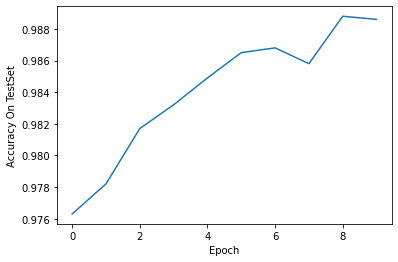

In [11]:
if __name__ == '__main__':
    acc_list_test = []
    for epoch in range(EPOCHS):
        train(epoch)
        # if epoch % 10 == 9:  #每训练10轮 测试1次
        acc_test = test(epoch)
        acc_list_test.append(acc_test)

    plt.plot(acc_list_test)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy On TestSet')
    plt.show()